In [1]:
# Step 4: 04_model_training.ipynb

# GOAL: Train all 6 models for the project. 

# TASKS
# Load saved feature sets for each combo (from "data/features/NEU-DET").
# Train a multiclass logistic regression model (softmax via multi_class='multinomial').
# Evaluate the models using accuracy, precision, recall, and F1-score.
# Save trained models and metric summaries for comparison.

In [2]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
# set up configuration
FEATURE_ROOT = "../data/features/NEU-DET"
COMBOS_TO_RUN = [
    name for name in os.listdir(FEATURE_ROOT)
    if os.path.isdir(os.path.join(FEATURE_ROOT, name))
]
MODEL_OUTPUT_ROOT = "../models"
os.makedirs(MODEL_OUTPUT_ROOT, exist_ok=True)

In [4]:
# redefine feature sets 
feature_sets = [
    "hog",
    "edge",
    "raw",
    "hog_edge",
    "hog_pca",
    "hog_edge_pca"
]

# set up another label encoder
label_encoder = LabelEncoder()


⏳Training model for feature set: hog
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=   2.5s
[CV] END .............................................C=0.01; total time=   2.3s
[CV] END .............................................C=0.01; total time=   1.7s
[CV] END ..............................................C=0.1; total time=   1.1s
[CV] END ..............................................C=0.1; total time=   1.5s
[CV] END ..............................................C=0.1; total time=   1.3s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.7s
[CV] END ...............................................C=10; total time=   0.6s
[CV] END ...............................................C=10; total time=   0.5s
[CV] END ..

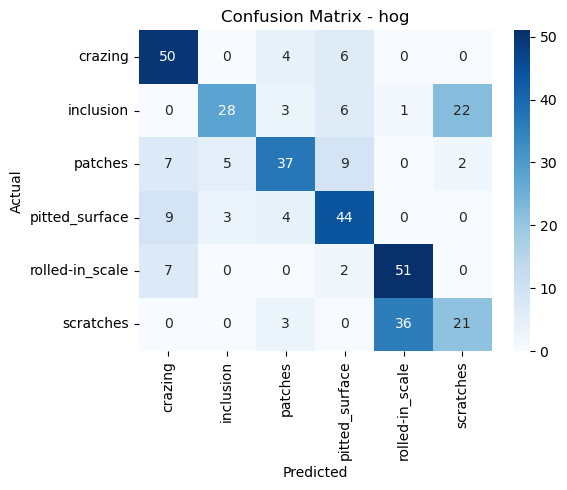


⏳Training model for feature set: edge
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=   6.7s
[CV] END .............................................C=0.01; total time=   6.2s
[CV] END .............................................C=0.01; total time=   7.3s
[CV] END ..............................................C=0.1; total time=   2.9s
[CV] END ..............................................C=0.1; total time=   2.7s
[CV] END ..............................................C=0.1; total time=   2.6s
[CV] END ................................................C=1; total time=   1.5s
[CV] END ................................................C=1; total time=   1.3s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ...............................................C=10; total time=   1.1s
[CV] END ...............................................C=10; total time=   1.0s
[CV] END .

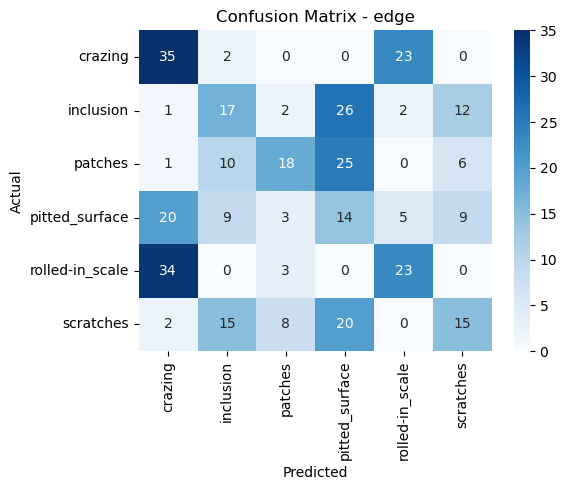


⏳Training model for feature set: raw
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=  12.6s
[CV] END .............................................C=0.01; total time=   9.3s
[CV] END .............................................C=0.01; total time=   9.0s
[CV] END ..............................................C=0.1; total time=  13.5s
[CV] END ..............................................C=0.1; total time=  11.3s
[CV] END ..............................................C=0.1; total time=   9.1s
[CV] END ................................................C=1; total time=   9.1s
[CV] END ................................................C=1; total time=   7.7s
[CV] END ................................................C=1; total time=   6.5s
[CV] END ...............................................C=10; total time=   3.2s
[CV] END ...............................................C=10; total time=   3.2s
[CV] END ..

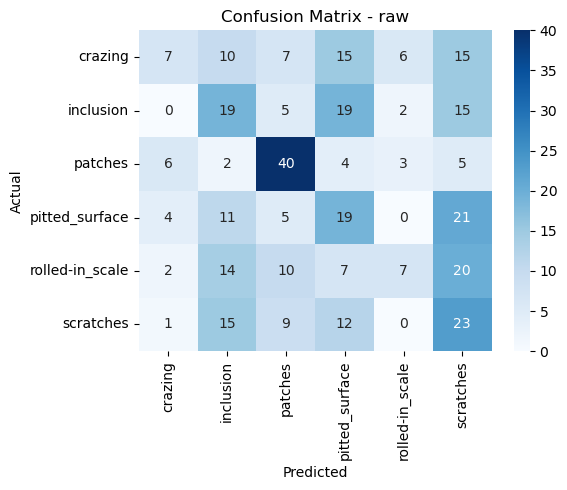


⏳Training model for feature set: hog_edge
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=   5.5s
[CV] END .............................................C=0.01; total time=   5.6s
[CV] END .............................................C=0.01; total time=   5.7s
[CV] END ..............................................C=0.1; total time=   2.0s
[CV] END ..............................................C=0.1; total time=   1.9s
[CV] END ..............................................C=0.1; total time=   2.2s
[CV] END ................................................C=1; total time=   0.8s
[CV] END ................................................C=1; total time=   0.8s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ...............................................C=10; total time=   0.7s
[CV] END ...............................................C=10; total time=   0.8s
[CV] E

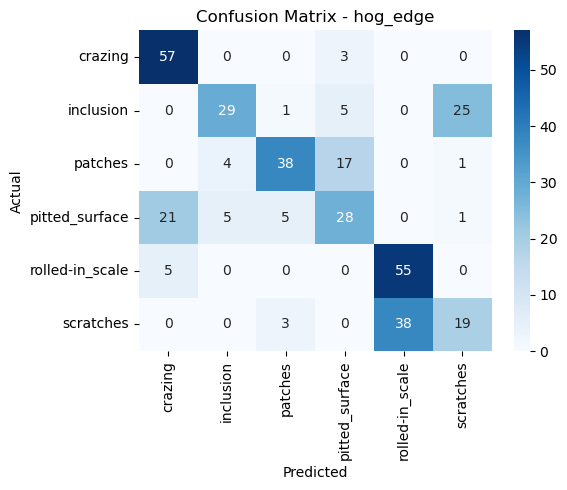


⏳Training model for feature set: hog_pca
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ...............................................C=10; total time=   0.5s
[CV] END ...............................................C=10; total time=   0.7s
[CV] EN

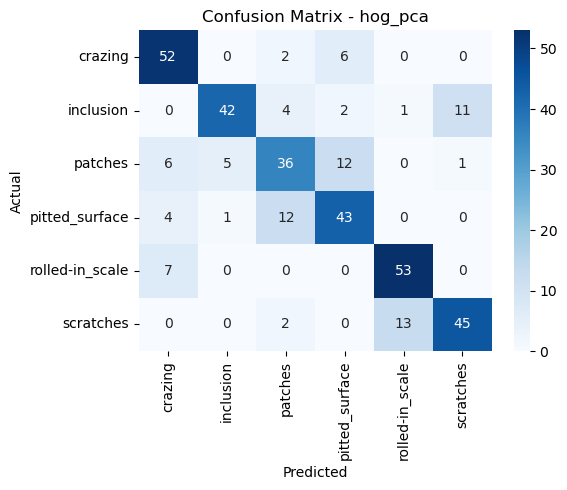


⏳Training model for feature set: hog_edge_pca
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.4s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.5s
[CV] END ..............................................C=0.1; total time=   0.7s
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ................................................C=1; total time=   1.0s
[CV] END ................................................C=1; total time=   0.9s
[CV] END ................................................C=1; total time=   1.0s
[CV] END ...............................................C=10; total time=   1.2s
[CV] END ...............................................C=10; total time=   0.9s
[C

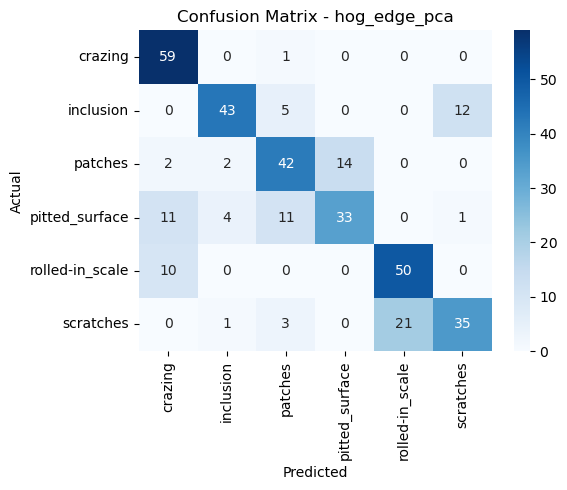

In [5]:
# loop through each feature set and set paths 
for combo in feature_sets: 
    print(f"\n⏳ Training model for feature set: {combo}")
    feature_path = os.path.join(FEATURE_ROOT, combo)

    X_train = joblib.load(os.path.join(feature_path, "X_train.pkl"))
    y_train = joblib.load(os.path.join(feature_path, "y_train.pkl"))
    X_val = joblib.load(os.path.join(feature_path, "X_validation.pkl"))
    y_val = joblib.load(os.path.join(feature_path, "y_validation.pkl"))
    
    y_train_enc = label_encoder.fit_transform(y_train)
    y_val_enc = label_encoder.transform(y_val)

    # train with hyperparameter tuning using GridSearchCV
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

    grid = GridSearchCV(
        estimator=LogisticRegression(
            solver='lbfgs',
            max_iter=10000,
            random_state=42
        ),
        param_grid=param_grid,
        scoring='f1_macro',
        cv=3,
        verbose=2,
        n_jobs=1
    )

    grid.fit(X_train, y_train_enc)
    clf = grid.best_estimator_

    print(f"   ✅ Best C found for {combo}: {grid.best_params_['C']} | F1-macro: {grid.best_score_:.4f}")

    # evaluation on validation set
    y_pred = clf.predict(X_val)
    report = classification_report(y_val_enc, y_pred, target_names=label_encoder.classes_, output_dict=True)
    conf_mat = confusion_matrix(y_val_enc, y_pred)

    
    # save model and report to disk
    model_path = os.path.join(MODEL_OUTPUT_ROOT, f"{combo}_logreg.pkl")
    report_path = os.path.join(MODEL_OUTPUT_ROOT, f"{combo}_report.txt")

    # save report
    joblib.dump(clf, model_path)
    with open(report_path, "w") as f:
        f.write(classification_report(y_val_enc, y_pred, target_names=label_encoder.classes_))

    print(f"   💾 Model and report saved for: {combo}")

    # visualize the results with a confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {combo}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()